In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 4000
training_epochs = 100
nb_classes = 16
drop_rate = 0.3

In [2]:
xy = np.loadtxt('MIMO_2_25dB_NoC_16.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 1:13]
y_data = xy[:, -4:]

print(x_data.shape, y_data.shape)
print(x_data[0])

(1600000, 12) (1600000, 4)
[ 1.3072666   0.42960188  0.16644062  0.22091642 -0.27058634 -0.20962702
 -0.25658306  0.03533361  0.25618953 -0.248537   -1.051822   -0.6120007 ]


In [3]:
# Convert y_data to y_bit
i=1
y_merge = []
while i <= y_data.shape[0]:
    temp = "".join(str(_) for _ in y_data[i-1,:])
    y_merge.append(temp)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_merge)
y_bit = encoder.transform(y_merge)
y_bit = y_bit.reshape(-1, 1)
print(y_bit)

[[ 3]
 [ 3]
 [ 3]
 ...
 [12]
 [12]
 [12]]


In [4]:
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_bit, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [6]:
tf.model.add(tf.keras.layers.Dense(input_dim=x_data.shape[1], units=768, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=384, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=192, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               9984      
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)               295296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               73920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                3

In [7]:
history = tf.model.fit(x_data, y_one_hot, batch_size=batch_size , epochs=training_epochs)

Epoch 1/100
400/400 [==============================] - 3s 5ms/step - loss: 0.9747 - accuracy: 0.7940
Epoch 2/100
400/400 [==============================] - 2s 5ms/step - loss: 0.4745 - accuracy: 0.9240
Epoch 3/100
400/400 [==============================] - 2s 5ms/step - loss: 0.4171 - accuracy: 0.9376
Epoch 4/100
400/400 [==============================] - 2s 5ms/step - loss: 0.3827 - accuracy: 0.9458
Epoch 5/100
400/400 [==============================] - 2s 5ms/step - loss: 0.3587 - accuracy: 0.9505
Epoch 6/100
400/400 [==============================] - 2s 5ms/step - loss: 0.3388 - accuracy: 0.9546
Epoch 7/100
400/400 [==============================] - 2s 5ms/step - loss: 0.3238 - accuracy: 0.9570
Epoch 8/100
400/400 [==============================] - 2s 5ms/step - loss: 0.3101 - accuracy: 0.9593
Epoch 9/100
400/400 [==============================] - 2s 5ms/step - loss: 0.2985 - accuracy: 0.9607
Epoch 10/100
400/400 [==============================] - 2s 5ms/step - loss: 0.2893 - accura

400/400 [==============================] - 2s 5ms/step - loss: 0.1782 - accuracy: 0.9682
Epoch 81/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1779 - accuracy: 0.9682
Epoch 82/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1769 - accuracy: 0.9686
Epoch 83/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1782 - accuracy: 0.9680
Epoch 84/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1776 - accuracy: 0.9682
Epoch 85/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1762 - accuracy: 0.9686
Epoch 86/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1758 - accuracy: 0.9686
Epoch 87/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1755 - accuracy: 0.9686
Epoch 88/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1768 - accuracy: 0.9681
Epoch 89/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1757 - accuracy: 

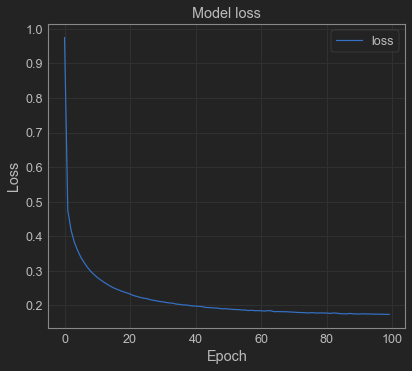

In [8]:
# 모델 손실 함수 시각화
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(history.history['loss'], 'b-', label='loss')
#plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

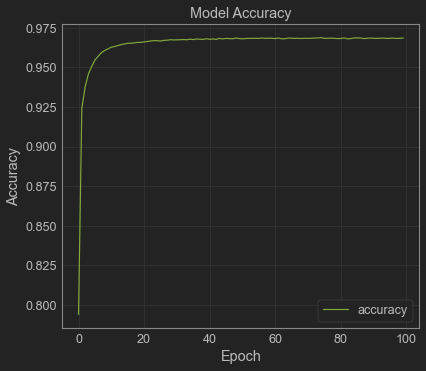

In [9]:
# 모델 정확도 시각화
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
#plt.plot(history.history['val_accuracy'], 'r-', label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Full x_data test
test_data = np.loadtxt('MIMO_2_25dB_NoC_16_test.csv', delimiter=',', dtype=np.float32)
x_test_data = test_data[:, 1:13]
y_test_data = test_data[:, -4:]
print(x_test_data.shape, y_test_data.shape)

(320000, 12) (320000, 4)


In [11]:
# Convert y_test_data to y_test_bit
i=1
y_test_merge = []
while i <= y_test_data.shape[0]:
    temp2 = "".join(str(_) for _ in y_test_data[i-1,:])
    y_test_merge.append(temp2)
    i = i + 1

encoder = LabelEncoder()
encoder.fit(y_test_merge)
y_test_bit = encoder.transform(y_test_merge)
y_test_bit = y_test_bit.reshape(-1, 1)
print(y_test_bit)

[[ 3]
 [ 3]
 [ 3]
 ...
 [12]
 [12]
 [12]]


In [12]:
# Convert y_data to one_hot
y_test_one_hot = tf.keras.utils.to_categorical(y_test_bit, nb_classes)
print("one_hot:", y_test_one_hot)

one_hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
evaluation = tf.model.evaluate(x_test_data, y_test_one_hot)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

10000/10000 [==============================] - 17s 2ms/step - loss: 0.1288 - accuracy: 0.9844
loss:  0.12879422307014465
accuracy 0.984403133392334


In [14]:
#pre_error_cnt = 0
predict_x = tf.model.predict(x_test_data) 
pred = np.argmax(predict_x,axis=1)
#for p, y in zip(pred, y_test_bit.flatten()):
    #print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    #if p != int(y):
        #pre_error_cnt += 1
#print("Prediction Error Count : ", pre_error_cnt)

In [15]:
res_pred = pred.reshape(y_test_data.shape[0], 1)
error_cnt = 0
error = 0
for i in range(0, y_test_data.shape[0]):
    if res_pred[i] != y_test_bit[i]:
        #print("False : {}".format(i))
        #print("[{}] data : {}".format(i, y_test_data[i]))
        error += 1
        for n in range(0, y_test_data.shape[0], int(y_test_data.shape[0]/nb_classes)):
            if y_test_bit[n] == res_pred[i]:
                #print("[{}] pred data: {}".format(n, y_test_data[n]))
                bit_error = 0
                for m in range(0, y_test_data.shape[1]): 
                    if y_test_data[i, m] != y_test_data[n, m]:
                        bit_error += 1
                        error_cnt += 1
                #print("bit error count : ", bit_error)
                break
print("Error : {}".format(error))
print("Error Count: {}".format(error_cnt))

Error : 4991
Error Count: 7032


In [16]:
BER = (error_cnt)/(y_test_data.shape[0]*2*2)
print("BER: {}".format(BER))

BER: 0.00549375
